In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
#TODO: copy happiness_data.csv into your drive, then read into pandas dataframe
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)
dataFile = open("happiness_data.csv", 'r')
data = pd.read_csv(dataFile)

Mounted at /content/drive/


In [2]:
x_metric = 'GDP per capita'
y_metric = 'Social support'

#TODO: Assign the data to a numpy array
x_arr = data[x_metric].to_numpy()
y_arr = data[y_metric].to_numpy()

In [4]:
import doctest
import numpy as np

def get_ab(x, y):
  """

    >>> get_ab(np.array([0, 1, 2]), np.array([2, 4, 6]))
    array([2., 2.])
    >>> get_ab(np.array([1, 2, 5]), np.array([1, 1, 2]))
    array([0.61538462, 0.26923077])
  """

  # Params:
  #   x - NumPy array with one axis representing data from variable x_metric
  #   y - NumPy array with one axis representing data from variable y_metric
  # Return:
  #   NumPy array of size 2 with element 0 representing a and element 1
  #   representing b in the line of best fit a + bx = y using the equation above

  # TODO: Step 1 - transform x from a vector of shape n x 1 into a matrix of
  #       shape n x 2.
  ones = np.ones(len(x), dtype=int)

  numArr = np.transpose(np.stack((ones,x), axis=0))

  # print(numArr)



  # TODO: Step 2 - perform the equation on new x and y, return the result

  transformed = np.transpose(numArr)
  # print(np.dot(transformed, numArr))
  inverse = np.linalg.inv(np.dot(transformed, numArr))
  dot1 = np.dot(inverse, transformed)
  dot2 = np.dot(dot1, y)
  return dot2

# get_ab(np.array([0, 1, 2]), np.array([2, 4, 6]))
doctest.run_docstring_examples(get_ab, globals(), verbose=True)


PYDEV DEBUGGER WARNING:
sys.settrace() should not be used when the debugger is being used.
This may cause the debugger to stop working correctly.
If this is needed, please check: 
http://pydev.blogspot.com/2007/06/why-cant-pydev-debugger-work-with.html
to see how to restore the debug tracing back correctly.
Call Location:
  File "/usr/lib/python3.10/doctest.py", line 1501, in run
    sys.settrace(save_trace)



Finding tests in NoName
Trying:
    get_ab(np.array([0, 1, 2]), np.array([2, 4, 6]))
Expecting:
    array([2., 2.])
ok
Trying:
    get_ab(np.array([1, 2, 5]), np.array([1, 1, 2]))
Expecting:
    array([0.61538462, 0.26923077])
ok


In [6]:
import doctest
import numpy as np
import math

def get_r(x, y):
  '''
  >>> print(get_r(np.array([0, 1, 2]), np.array([2, 4, 6])))
  1.0
  >>> print(str(int(get_r(np.array([1, 2, 5]), np.array([1, 1, 2])) * 1000000)))
  970725
  >>> print(str(int(get_r(np.array([4, 2, 1, 6, 8, 9]), np.array([3, 3, 7, 8, 2, 2])) * 1000000)))
  -422934
  '''
  n=len(x)
  a = np.sum(np.dot(x,y)) * n
  b=np.sum(x) * np.sum(y)
  c=np.sum(x ** 2) * n - (np.sum(x)**2)
  d=np.sum(y**2) * n - (np.sum(y)**2)
  sqrt = math.sqrt(c*d)
  return(a-b)/sqrt
  # TODO: fill in method
  # Params:
  #   x - NumPy array with one axis representing data from variable x_metric
  #   y - NumPy array with one axis representing data from variable y_metric
  # Return:
  #   float representing the Pearson Correlation Coefficient of x and y

doctest.run_docstring_examples(get_r, globals(), verbose=True)

Finding tests in NoName
Trying:
    print(get_r(np.array([0, 1, 2]), np.array([2, 4, 6])))
Expecting:
    1.0
ok
Trying:
    print(str(int(get_r(np.array([1, 2, 5]), np.array([1, 1, 2])) * 1000000)))
Expecting:
    970725
ok
Trying:
    print(str(int(get_r(np.array([4, 2, 1, 6, 8, 9]), np.array([3, 3, 7, 8, 2, 2])) * 1000000)))
Expecting:
    -422934
ok


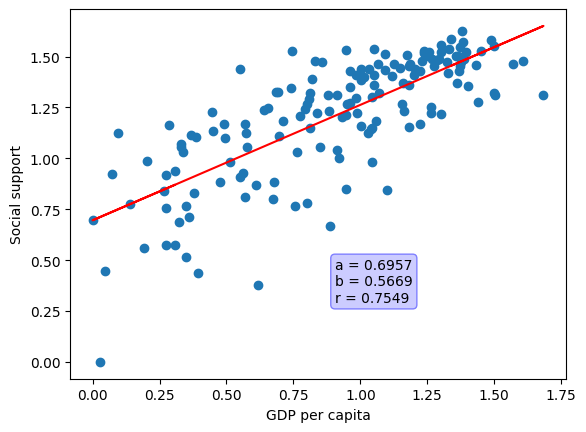

In [7]:
ab_arr = get_ab(x_arr, y_arr)
r = get_r(x_arr, y_arr)
a = ab_arr[0]
b = ab_arr[1]
plt.plot(data[x_metric], a + data[x_metric] * b, 'r')
plt.text(np.average(x_arr), a + np.min(x_arr) * b - .4,
             "a = " + "{:.4f}".format(a) + "\nb = " + "{:.4f}".format(b) + "\nr = " + "{:.4f}".format(r),
             bbox = dict(boxstyle="round",
                ec=(0.5, 0.5, 1.),
                fc=(0.8, 0.8, 1.),
             )
        )


plt.scatter(data[x_metric], data[y_metric])
plt.xlabel(x_metric)
plt.ylabel(y_metric)

plt.show()

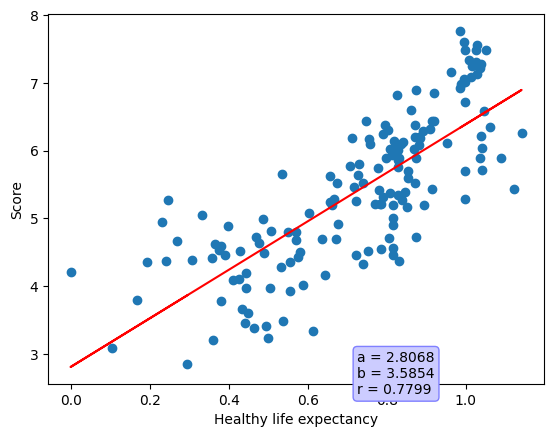

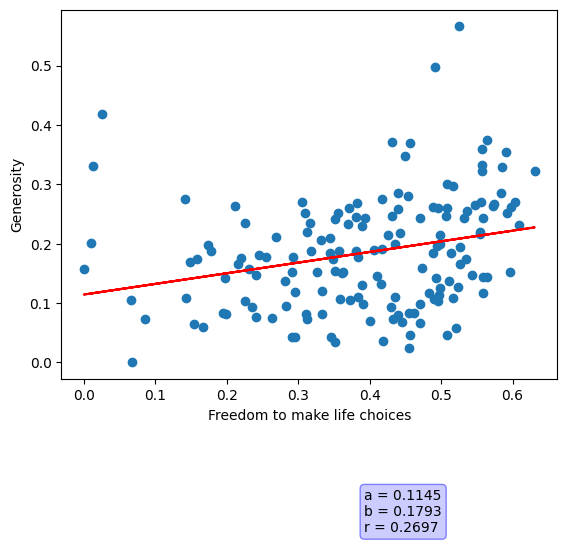

In [8]:
x_metric = 'Healthy life expectancy'
y_metric = 'Score'

#TODO: Assign the data to a numpy array
x_arr = data[x_metric].to_numpy()
y_arr = data[y_metric].to_numpy()
ab_arr = get_ab(x_arr, y_arr)
r = get_r(x_arr, y_arr)
a = ab_arr[0]
b = ab_arr[1]
plt.plot(data[x_metric], a + data[x_metric] * b, 'r')
plt.text(np.average(x_arr), a + np.min(x_arr) * b - .4,
             "a = " + "{:.4f}".format(a) + "\nb = " + "{:.4f}".format(b) + "\nr = " + "{:.4f}".format(r),
             bbox = dict(boxstyle="round",
                ec=(0.5, 0.5, 1.),
                fc=(0.8, 0.8, 1.),
             )
        )


plt.scatter(data[x_metric], data[y_metric])
plt.xlabel(x_metric)
plt.ylabel(y_metric)

plt.show()
#TODO - Your Turn 2
#       Create the appropriate setup and variable assignments
#       to exame the relationship between 2 variables (different from the previous steps)
#       Capture the plots as in the previous steps and note your observations.
x_metric = 'Freedom to make life choices'
y_metric = 'Generosity'

#TODO: Assign the data to a numpy array
x_arr = data[x_metric].to_numpy()
y_arr = data[y_metric].to_numpy()
ab_arr = get_ab(x_arr, y_arr)
r = get_r(x_arr, y_arr)
a = ab_arr[0]
b = ab_arr[1]
plt.plot(data[x_metric], a + data[x_metric] * b, 'r')
plt.text(np.average(x_arr), a + np.min(x_arr) * b - .4,
             "a = " + "{:.4f}".format(a) + "\nb = " + "{:.4f}".format(b) + "\nr = " + "{:.4f}".format(r),
             bbox = dict(boxstyle="round",
                ec=(0.5, 0.5, 1.),
                fc=(0.8, 0.8, 1.),
             )
        )


plt.scatter(data[x_metric], data[y_metric])
plt.xlabel(x_metric)
plt.ylabel(y_metric)

plt.show()